## To Do

- regression for conditions
  - tvns DONE
  - sham DONE
  - partial DONE
  - full DONE
- compare blocks?
- fix scatter plots
- moving avg calculation on rewards (ascending)

In [1]:
# Importing relevant libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency

In [2]:
# Importing dataset

data = pd.read_csv('project_S034csv.csv')

In [3]:
data

,block,trial,task,tvns,decision,reward
0,1,1,partial,tVNS,2,41
1,1,2,partial,tVNS,2,57
2,1,3,partial,tVNS,2,62
3,1,4,partial,tVNS,2,76
4,1,5,partial,tVNS,2,76
...,...,...,...,...,...,...
443,4,52,partial,sham,2,52
444,4,53,partial,sham,2,53
445,4,54,partial,sham,2,29
446,4,55,partial,sham,2,25


In [4]:
# Adding a column showing whether a switch was made in the following trial
# 0 = no switch
# 1 = switch

decision_list = data['decision'].tolist()

switch_list = []

for i in range(len(decision_list)-1):
    x = decision_list[i]
    y = decision_list[i+1]
    if x == y:
        switch_list.append('0')
    else:
        switch_list.append('1')

if switch_list[-1] == switch_list[-2]:
    switch_list.append('0')
else:
    switch_list.append('1')

data['switch'] = switch_list
data['switch'] = pd.to_numeric(data['switch'])


In [5]:
data.head(20)

,block,trial,task,tvns,decision,reward,switch
0,1,1,partial,tVNS,2,41,0
1,1,2,partial,tVNS,2,57,0
2,1,3,partial,tVNS,2,62,0
3,1,4,partial,tVNS,2,76,0
4,1,5,partial,tVNS,2,76,0
5,1,6,partial,tVNS,2,81,0
6,1,7,partial,tVNS,2,55,1
7,1,8,partial,tVNS,1,67,0
8,1,9,partial,tVNS,1,35,1
9,1,10,partial,tVNS,2,18,1


In [6]:
data['reward_levels'] = pd.qcut(data['reward'], 5, labels = ['low', 'lower medium', 'medium', 'upper medium', 'high'])
data.head(20)

,block,trial,task,tvns,decision,reward,switch,reward_levels
0,1,1,partial,tVNS,2,41,0,lower medium
1,1,2,partial,tVNS,2,57,0,medium
2,1,3,partial,tVNS,2,62,0,medium
3,1,4,partial,tVNS,2,76,0,upper medium
4,1,5,partial,tVNS,2,76,0,upper medium
5,1,6,partial,tVNS,2,81,0,high
6,1,7,partial,tVNS,2,55,1,medium
7,1,8,partial,tVNS,1,67,0,upper medium
8,1,9,partial,tVNS,1,35,1,lower medium
9,1,10,partial,tVNS,2,18,1,low


In [7]:
data.dtypes

block               int64
trial               int64
task               object
tvns               object
decision            int64
reward              int64
switch              int64
reward_levels    category
dtype: object

In [8]:
# Defining relevant dataframes for future analysis

data_tvns = data[data['tvns'] == 'tVNS']
data_sham = data[data['tvns'] == 'sham']

data_partial = data[data['task'] == 'partial']
data_full = data[data['task'] == 'full']

data_tvns_block1 = data_tvns[data_tvns['block'] == 1]
data_tvns_block2 = data_tvns[data_tvns['block'] == 2]
data_tvns_block3 = data_tvns[data_tvns['block'] == 3]
data_tvns_block4 = data_tvns[data_tvns['block'] == 4]

data_sham_block1 = data_sham[data_sham['block'] == 1]
data_sham_block2 = data_sham[data_sham['block'] == 2]
data_sham_block3 = data_sham[data_sham['block'] == 3]
data_sham_block4 = data_sham[data_sham['block'] == 4]

In [9]:
print(data.corr())

                 block         trial  decision    reward    switch
block     1.000000e+00  2.378474e-16  0.075870  0.008534 -0.051688
trial     2.378474e-16  1.000000e+00  0.042813 -0.262333  0.107259
decision  7.586962e-02  4.281272e-02  1.000000  0.017022 -0.006020
reward    8.533564e-03 -2.623334e-01  0.017022  1.000000 -0.463054
switch   -5.168766e-02  1.072593e-01 -0.006020 -0.463054  1.000000


### Regression plot for all data

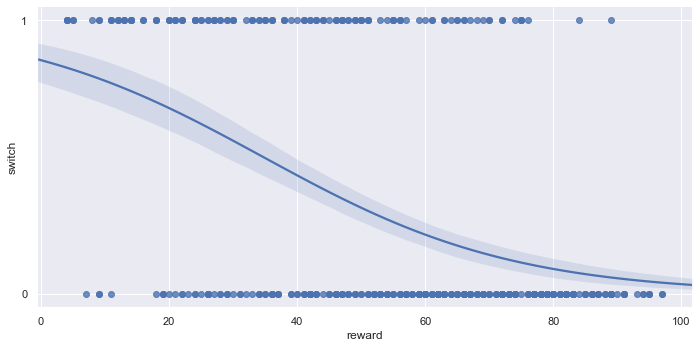

In [59]:
sns.lmplot(x="reward", y="switch", data=data, logistic=True, truncate=False, height=5, aspect=10/5)
xlim=(0, 99)
ylim=(-.05, 1.05)
plt.yticks([0, 1])
plt.show()


### Regression plot for tVNS condition

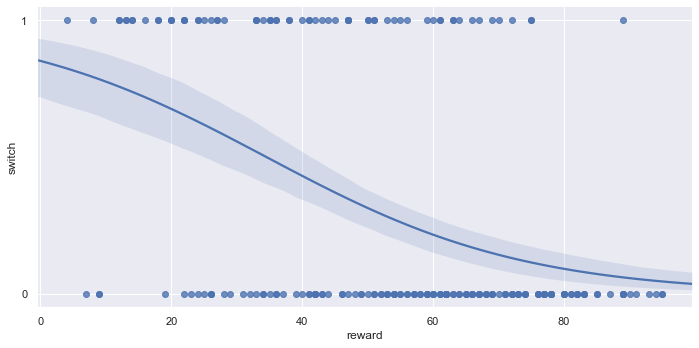

In [58]:
sns.lmplot(x="reward", y="switch", data=data_tvns, logistic=True, truncate=False, height=5, aspect=10/5)
xlim=(0, 99)
ylim=(-.05, 1.05)
plt.yticks([0, 1])
plt.show()

### Regression plot for sham condition

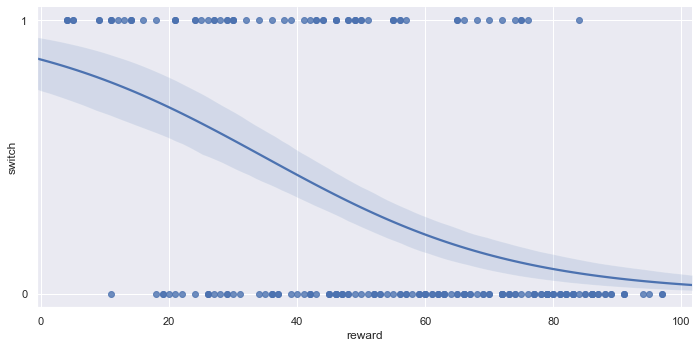

In [57]:
sns.lmplot(x="reward", y="switch", data=data_sham, logistic=True, truncate=False, height=5, aspect=10/5)
xlim=(0, 99)
ylim=(-.05, 1.05)
plt.yticks([0, 1])
plt.show()

### Regression plot for full outcome condition

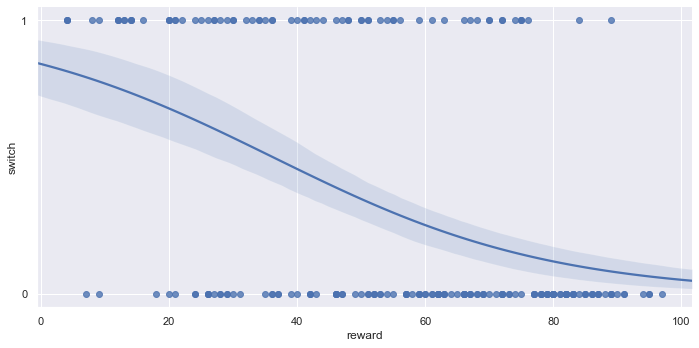

In [56]:
sns.lmplot(x="reward", y="switch", data=data_full, logistic=True, truncate=False, height=5, aspect=10/5)
xlim=(0, 99)
ylim=(-.05, 1.05)
plt.yticks([0, 1])
plt.show()

### Regression plot for partial outcome condition

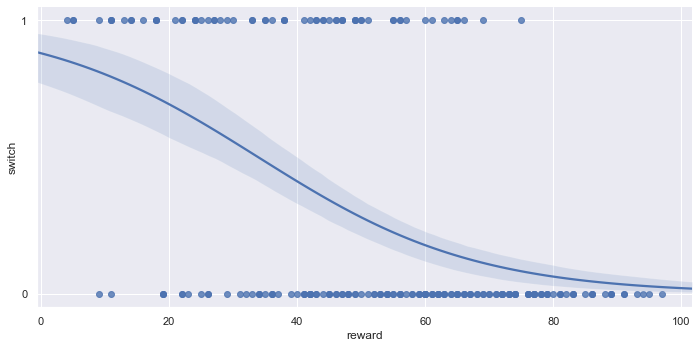

In [55]:
sns.lmplot(x="reward", y="switch", data=data_partial, logistic=True, truncate=False, height=5, aspect=10/5)
xlim=(0, 99)
ylim=(-.05, 1.05)
plt.yticks([0, 1])
plt.show()

### Regression tVNS

In [62]:
y_tvns = data_tvns['switch'].values.reshape(-1, 1)
X_tvns = data_tvns['reward'].values.reshape(-1, 1)

X_train_tvns, X_test_tvns, y_train_tvns, y_test_tvns = train_test_split(X_tvns, y_tvns, test_size = 0.75)

In [63]:
regressor_tvns = LogisticRegression(random_state = 42)

regressor_tvns.fit(X_train_tvns, y_train_tvns.ravel())

print("Intercept: \n", regressor_tvns.intercept_)

print("Coefficient: \n", regressor_tvns.coef_)

y_pred_tvns = regressor_tvns.predict(X_test_tvns)
cm_tvns = confusion_matrix(y_test_tvns, y_pred_tvns)
  
print ("Confusion Matrix : \n", cm_tvns)
print ("Precision : \n", accuracy_score(y_test_tvns, y_pred_tvns))

Intercept: 
 [1.78298079]
Coefficient: 
 [[-0.04951085]]
Confusion Matrix : 
 [[105  14]
 [ 26  23]]
Precision : 
 0.7619047619047619


In [18]:
# df_preds = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred.squeeze()})
# print(df_preds)

### Regression sham

In [64]:
y_sham = data_sham['switch'].values.reshape(-1, 1)
X_sham = data_sham['reward'].values.reshape(-1, 1)

X_train_sham, X_test_sham, y_train_sham, y_test_sham = train_test_split(X_sham, y_sham, test_size = 0.75)

In [65]:
regressor_sham = LogisticRegression(random_state = 42)

regressor_sham.fit(X_train_sham, y_train_sham.ravel())

print("Intercept: \n", regressor_sham.intercept_)

print("Coefficient: \n", regressor_sham.coef_)

y_pred_sham = regressor_sham.predict(X_test_sham)
cm_sham = confusion_matrix(y_test_sham, y_pred_sham)
  
print ("Confusion Matrix : \n", cm_sham)
print ("Accuracy : \n", accuracy_score(y_test_sham, y_pred_sham))

Intercept: 
 [4.4762687]
Coefficient: 
 [[-0.11415455]]
Confusion Matrix : 
 [[97 20]
 [28 23]]
Accuracy : 
 0.7142857142857143


### Regression partial

In [68]:
y_partial = data_partial['switch'].values.reshape(-1, 1)
X_partial = data_partial['reward'].values.reshape(-1, 1)

X_train_partial, X_test_partial, y_train_partial, y_test_partial = train_test_split(X_partial, y_partial, test_size = 0.75)

In [69]:
regressor_partial = LogisticRegression(random_state = 42)

regressor_partial.fit(X_train_partial, y_train_partial.ravel())

print("Intercept: \n", regressor_partial.intercept_)

print("Coefficient: \n", regressor_partial.coef_)

y_pred_partial = regressor_partial.predict(X_test_partial)
cm_partial = confusion_matrix(y_test_partial, y_pred_partial)
  
print ("Confusion Matrix : \n", cm_partial)
print ("Accuracy : \n", accuracy_score(y_test_partial, y_pred_partial))

Intercept: 
 [3.06187578]
Coefficient: 
 [[-0.08211888]]
Confusion Matrix : 
 [[103  17]
 [ 26  22]]
Accuracy : 
 0.7440476190476191


### Regression full

In [70]:
y_full = data_full['switch'].values.reshape(-1, 1)
X_full = data_full['reward'].values.reshape(-1, 1)

X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X_full, y_full, test_size = 0.75)

In [71]:
regressor_full = LogisticRegression(random_state = 42)

regressor_full.fit(X_train_full, y_train_full.ravel())

print("Intercept: \n", regressor_full.intercept_)

print("Coefficient: \n", regressor_full.coef_)

y_pred_full = regressor_full.predict(X_test_full)
cm_full = confusion_matrix(y_test_full, y_pred_full)
  
print ("Confusion Matrix : \n", cm_full)
print ("Accuracy : \n", accuracy_score(y_test_full, y_pred_full))

Intercept: 
 [2.43964712]
Coefficient: 
 [[-0.0573147]]
Confusion Matrix : 
 [[94 22]
 [24 28]]
Accuracy : 
 0.7261904761904762


### Chi-Square

In [ ]:
# all data

In [ ]:
data.groupby(by=['switch','reward_levels']).count()

In [ ]:
contingency = [[33, 60], [52, 37], [71, 23], [64, 18], [88, 2]]
chi2_contingency(np.array(contingency))

In [ ]:
# tVNS

In [ ]:
data_tvns.groupby(by=['switch','reward_levels']).count()

In [ ]:
contingency = [[16, 27], [24, 19], [41, 14], [36, 8], [38, 1]]
chi2_contingency(np.array(contingency))

In [ ]:
# sham

In [ ]:
data_sham.groupby(by=['switch','reward_levels']).count()

In [ ]:
contingency = [[17, 33], [28, 18], [30, 9], [28, 10], [50, 1]]
chi2_contingency(np.array(contingency))

In [ ]:
# partial

In [ ]:
data_partial.groupby(by=['switch','reward_levels']).count()

In [ ]:
contingency = [[15, 29], [33, 21], [39, 11], [37, 6], [33, 0]]
chi2_contingency(np.array(contingency))

In [ ]:
# full

In [ ]:
data_full.groupby(by=['switch','reward_levels']).count()

In [ ]:
contingency = [[18, 31], [19, 16], [32, 12], [27, 12], [55, 2]]
chi2_contingency(np.array(contingency))